In [16]:
import random
import pandas as pd
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.colors as mcolors

### Load in Gene Expression Data (Source: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE166975 )


In [17]:

file=open("genes")
data=file.readlines()
index=-1
for line in range(len(data)):
    if data[line][0:26]=='!series_matrix_table_begin':
        index=line
data=data[index+1:]
f = open("gene_expression", "w")
for i in data:
    f.write(i)
f.close()
file.close()
df=pd.read_csv('gene_expression', sep='\t')
df=df.set_index("ID_REF")
df=df[0:len(df)-1]
df=df.dropna()
ids=set(df.index)

## Load in Metadata that contains GO Ids! (same source)

In [18]:
file=open("family")
data=file.readlines()
index=-1
for line in range(len(data)):
    if data[line][0:21]=='!platform_table_begin':
        index=line

data=data[index+1:]
f = open("family_data", "w")
for i in data:
    f.write(i)
f.close()
file.close()

df2=pd.read_csv('family_data', sep='\t')
df2=df2[["ID","Gene Ontology Molecular Function"]]
df2=df2.dropna()
df2=df2[0:len(df2)-1]
df2=df2[df2["ID"].isin(df.index)]


C:\Users\pavit\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


##### Realize that data is too large to run MDS on the entire portion...

In [43]:
df=df[df.index.isin(df2["ID"])]
df

,GSM5090086,GSM5090087,GSM5090088,GSM5090089,GSM5090090,GSM5090091
ID_REF,,,,,,
1007_s_at,11.178959,11.226696,11.152975,11.316348,11.314495,11.341256
1053_at,9.529663,9.466560,9.704687,9.524805,9.544665,9.515306
117_at,5.861496,5.788102,5.594008,7.303257,5.872221,5.791595
121_at,8.423062,8.482636,8.162931,8.530678,8.605096,8.498175
1255_g_at,3.612051,3.602432,3.384577,3.599844,3.518589,3.522377
...,...,...,...,...,...,...
91684_g_at,8.512151,8.283812,8.596033,8.541491,8.590724,8.668193
91703_at,6.709465,6.654079,6.800611,6.697704,6.815231,6.842897
91816_f_at,9.038702,8.762708,8.963674,9.027359,8.287143,8.606033


### Option A: Run MDS on the first N rows
N controls how large this subset is..

### Option B: Run MDS on a random subset, based on function (Gene Ontology Molecular Function)
Chosen functions are printed out.
n specifies how many funcitonal categories to randomly select.

In [99]:
N=100
option="B"
n=10

In [100]:
if option=="A":
    #get all functions!
    GO_mol_function=set()
    functions=[]
    df2=df2[0:N]
    for i in df2['Gene Ontology Molecular Function']:
        GO_mol_function.add(i.split("//")[1])
        functions.append(i.split("//")[1])
    df2["function"]=functions

    df2_small=df2
    GO_mol_function=list(GO_mol_function)

    df_small=df[df.index.isin(df2["ID"])]
    
    cols={}
    items=list(mcolors.CSS4_COLORS.keys())
    for i in GO_mol_function:
        color=random.choice(items)
        while color in cols.values():
            color=random.choice(items)
        cols[i]=color
else:
    #get all functions!
    GO_mol_function=set()
    functions=[]
    for i in df2['Gene Ontology Molecular Function']:
        GO_mol_function.add(i.split("//")[1])
        functions.append(i.split("//")[1])
    df2["function"]=functions
    GO_mol_function=list(GO_mol_function)
    
    #choose N random functions
    types=[]
    for i in range(n):
        z=random.choice(GO_mol_function)
        while z in types:
            z=random.choice(GO_mol_function)
        types.append(z)
    print(types)

    df2_small={}
    for i in types:
        x=df2[df2["function"]==i]
        df2_small[i]=x
    df2_small[types[1]]

    df2_small=pd.concat(list(df2_small.values()))
    df_small=df[df.index.isin(df2_small["ID"])]
    cols={}
    items=list(mcolors.CSS4_COLORS.keys())
    for i in range(len(types)):
        color=random.choice(items)
        while color in cols.values():
            color=random.choice(items)
        cols[types[i]]=color


[' oligosaccharyl transferase activity ', ' alpha-L-arabinofuranosidase activity ', ' interleukin-33 binding ', ' protein complex binding ', ' phosphoglycerate dehydrogenase activity ', ' oxoglutarate dehydrogenase (succinyl-transferring) activity ', ' phosphatidylinositol 3-kinase catalytic subunit binding ', ' ACP phosphopantetheine attachment site binding involved in fatty acid biosynthetic process ', ' inorganic phosphate transmembrane transporter activity ', ' RNA polymerase III type 1 promoter DNA binding ']


### Check out smaller dataset

In [101]:
df2_small

,ID,Gene Ontology Molecular Function,function
5513,1560733_at,0004576 // oligosaccharyl transferase activity...,oligosaccharyl transferase activity
9987,200046_at,0004576 // oligosaccharyl transferase activity...,oligosaccharyl transferase activity
11671,202223_at,0004576 // oligosaccharyl transferase activity...,oligosaccharyl transferase activity
18090,208674_x_at,0004576 // oligosaccharyl transferase activity...,oligosaccharyl transferase activity
18091,208675_s_at,0004576 // oligosaccharyl transferase activity...,oligosaccharyl transferase activity
27488,218203_at,0004576 // oligosaccharyl transferase activity...,oligosaccharyl transferase activity
31835,222556_at,0004576 // oligosaccharyl transferase activity...,oligosaccharyl transferase activity
33959,224700_at,0004576 // oligosaccharyl transferase activity...,oligosaccharyl transferase activity
1086,1553746_a_at,0046556 // alpha-L-arabinofuranosidase activit...,alpha-L-arabinofuranosidase activity
16967,207526_s_at,0002113 // interleukin-33 binding // inferred ...,interleukin-33 binding


### Take a look at GO functions present in this subset

<BarContainer object of 10 artists>

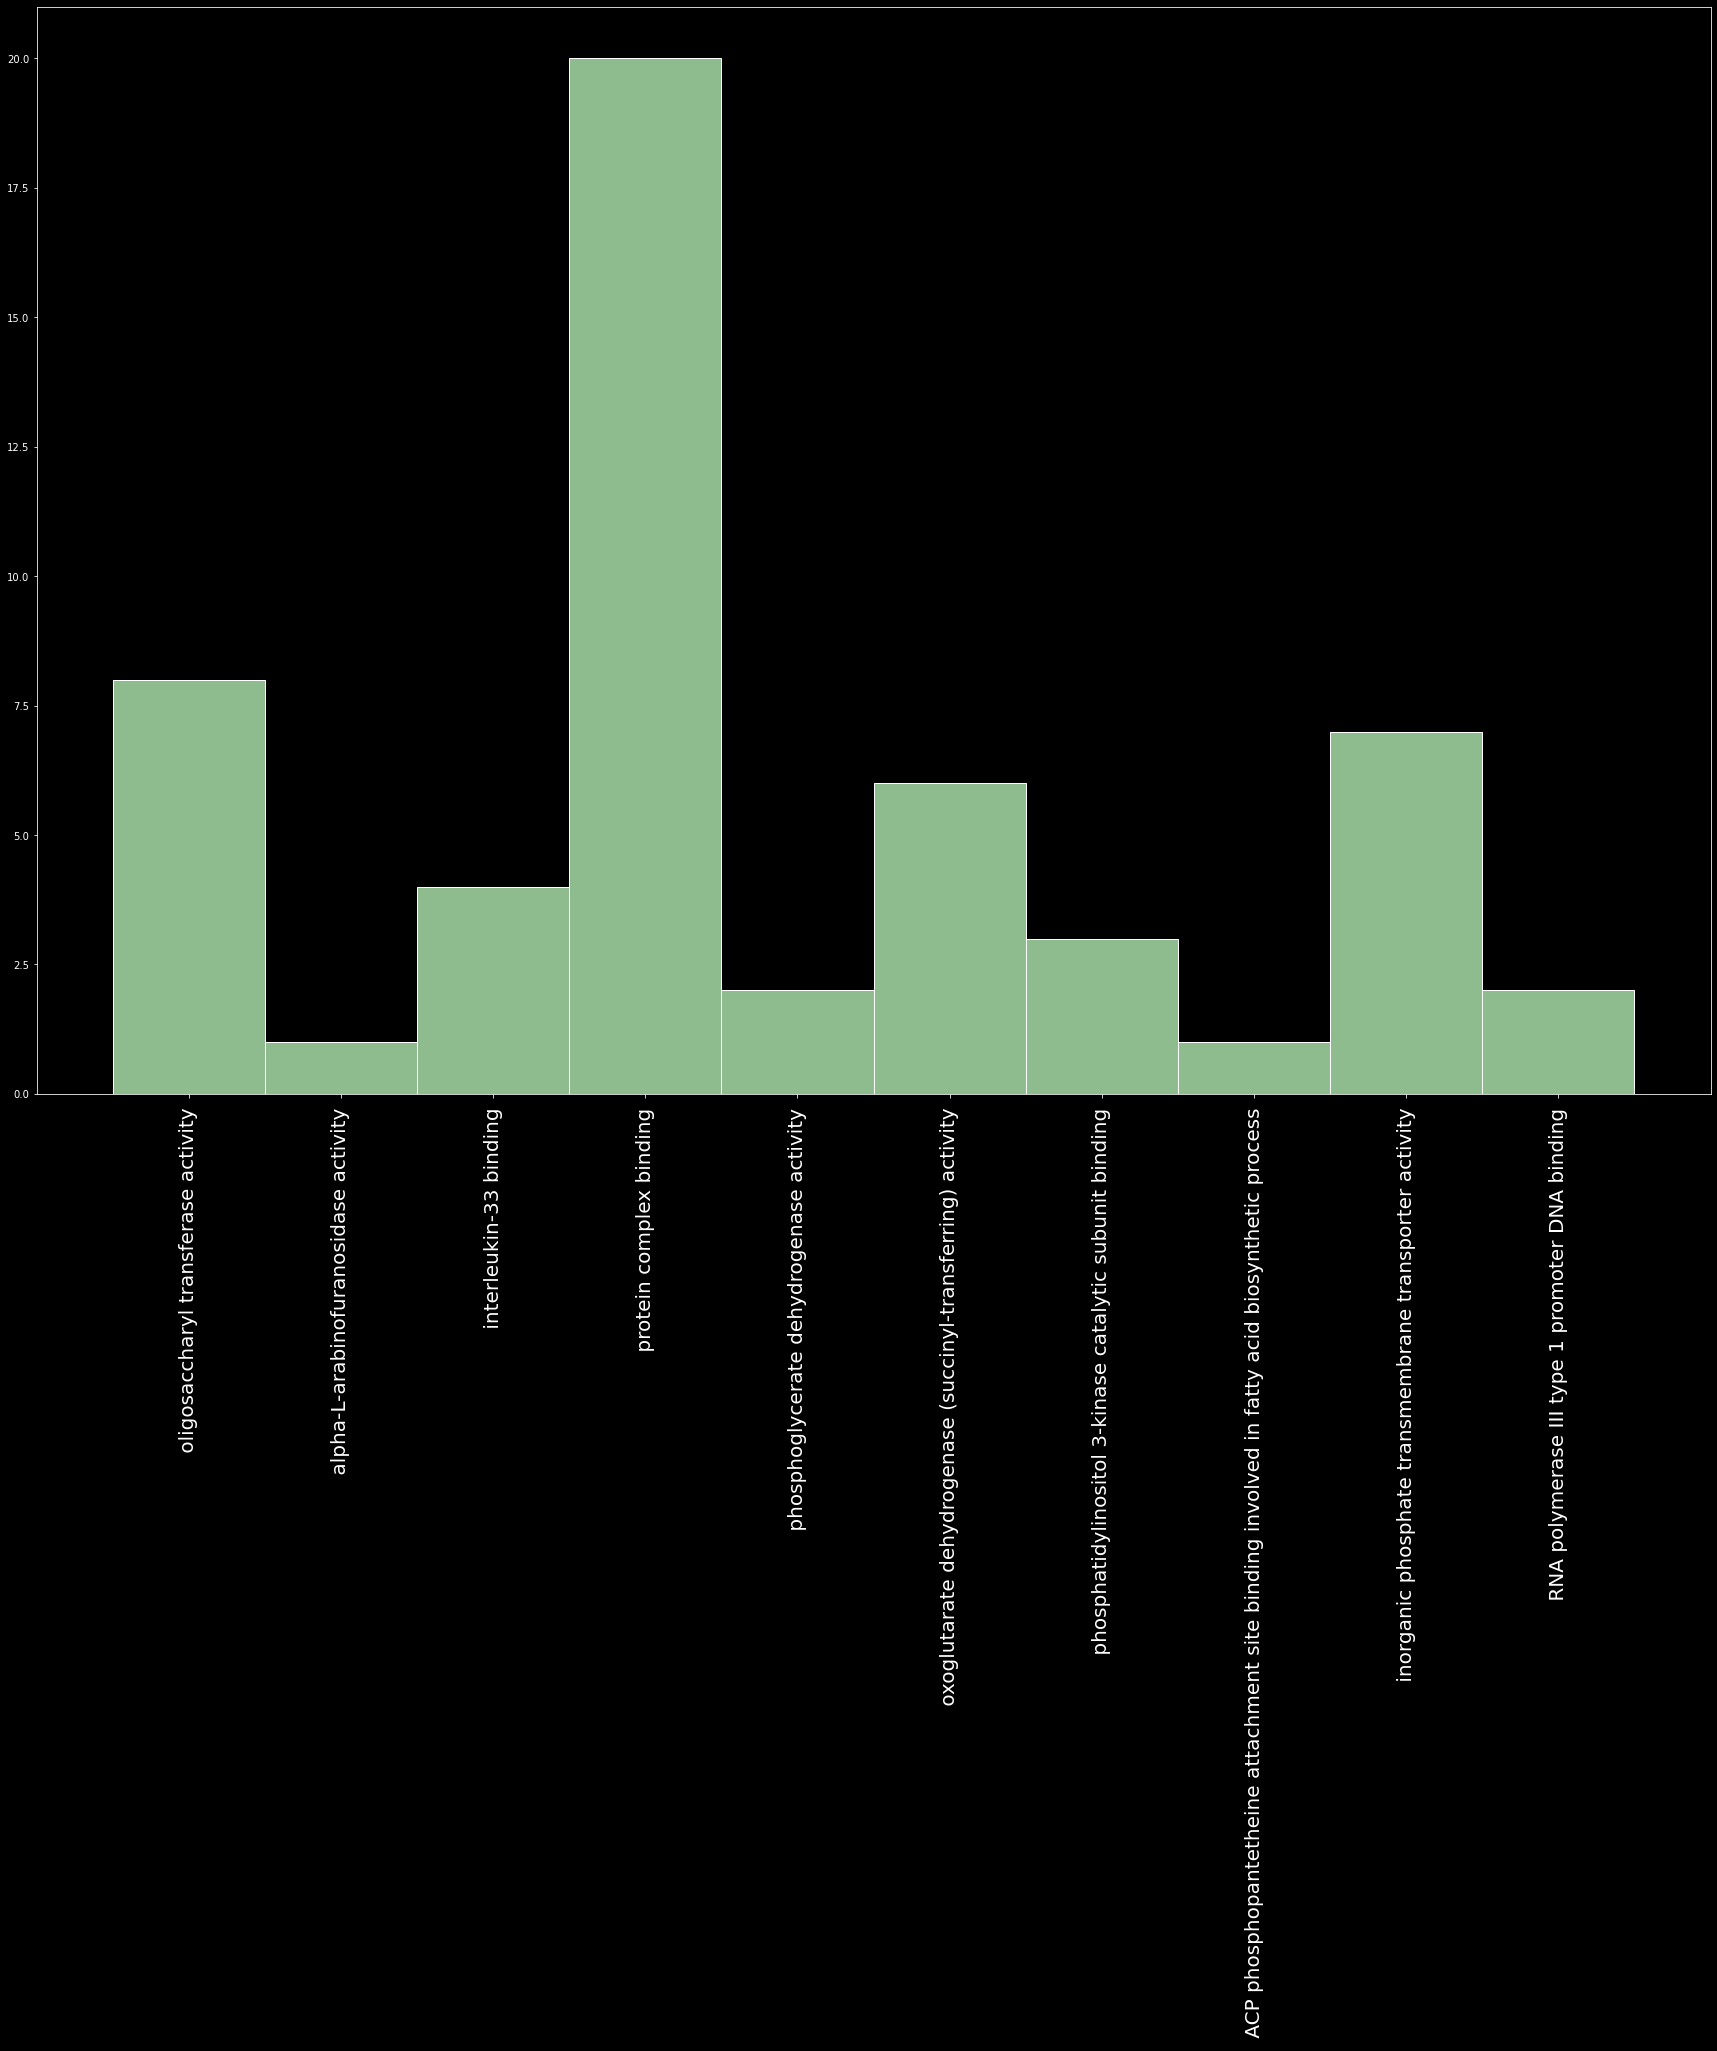

In [102]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [30,20]
labels, values = zip(*Counter(df2_small["function"]).items())
plt.xticks(rotation=90,fontsize=20)
plt.bar(labels,values,width=1,edgecolor="white",color="darkseagreen")


In [103]:
len(df2_small)

54

In [104]:
len(df_small)

54

### Create a way to map between gene ID and GO functional annotation

In [105]:
map_to_go=dict()
labels=[]
functions=list(df2_small['function'])
#print(functions)
for i in range(len(df_small)):
    map_to_go[df_small.index[i]]=functions[i]
    labels.append(functions[i])
#df_small["function"]=labels

### Preprocess

In [106]:
transform = MinMaxScaler()
df_scaled = pd.DataFrame(transform.fit_transform(df_small))
df_scaled.columns=df_small.columns
df_scaled.index=df_small.index

### Create a way to map between color to functional annotation

In [107]:
df_scaled
colors=[]
for i in df_scaled.index:
    colors.append(cols[map_to_go[i]])


### Run MDS for 2 dimensions

In [108]:
mds = MDS(2,random_state=2)
df_2d = mds.fit_transform(df_small)

### Visualize~ Color by Functional Annotation~Save Figure!

oaippopAiR.png


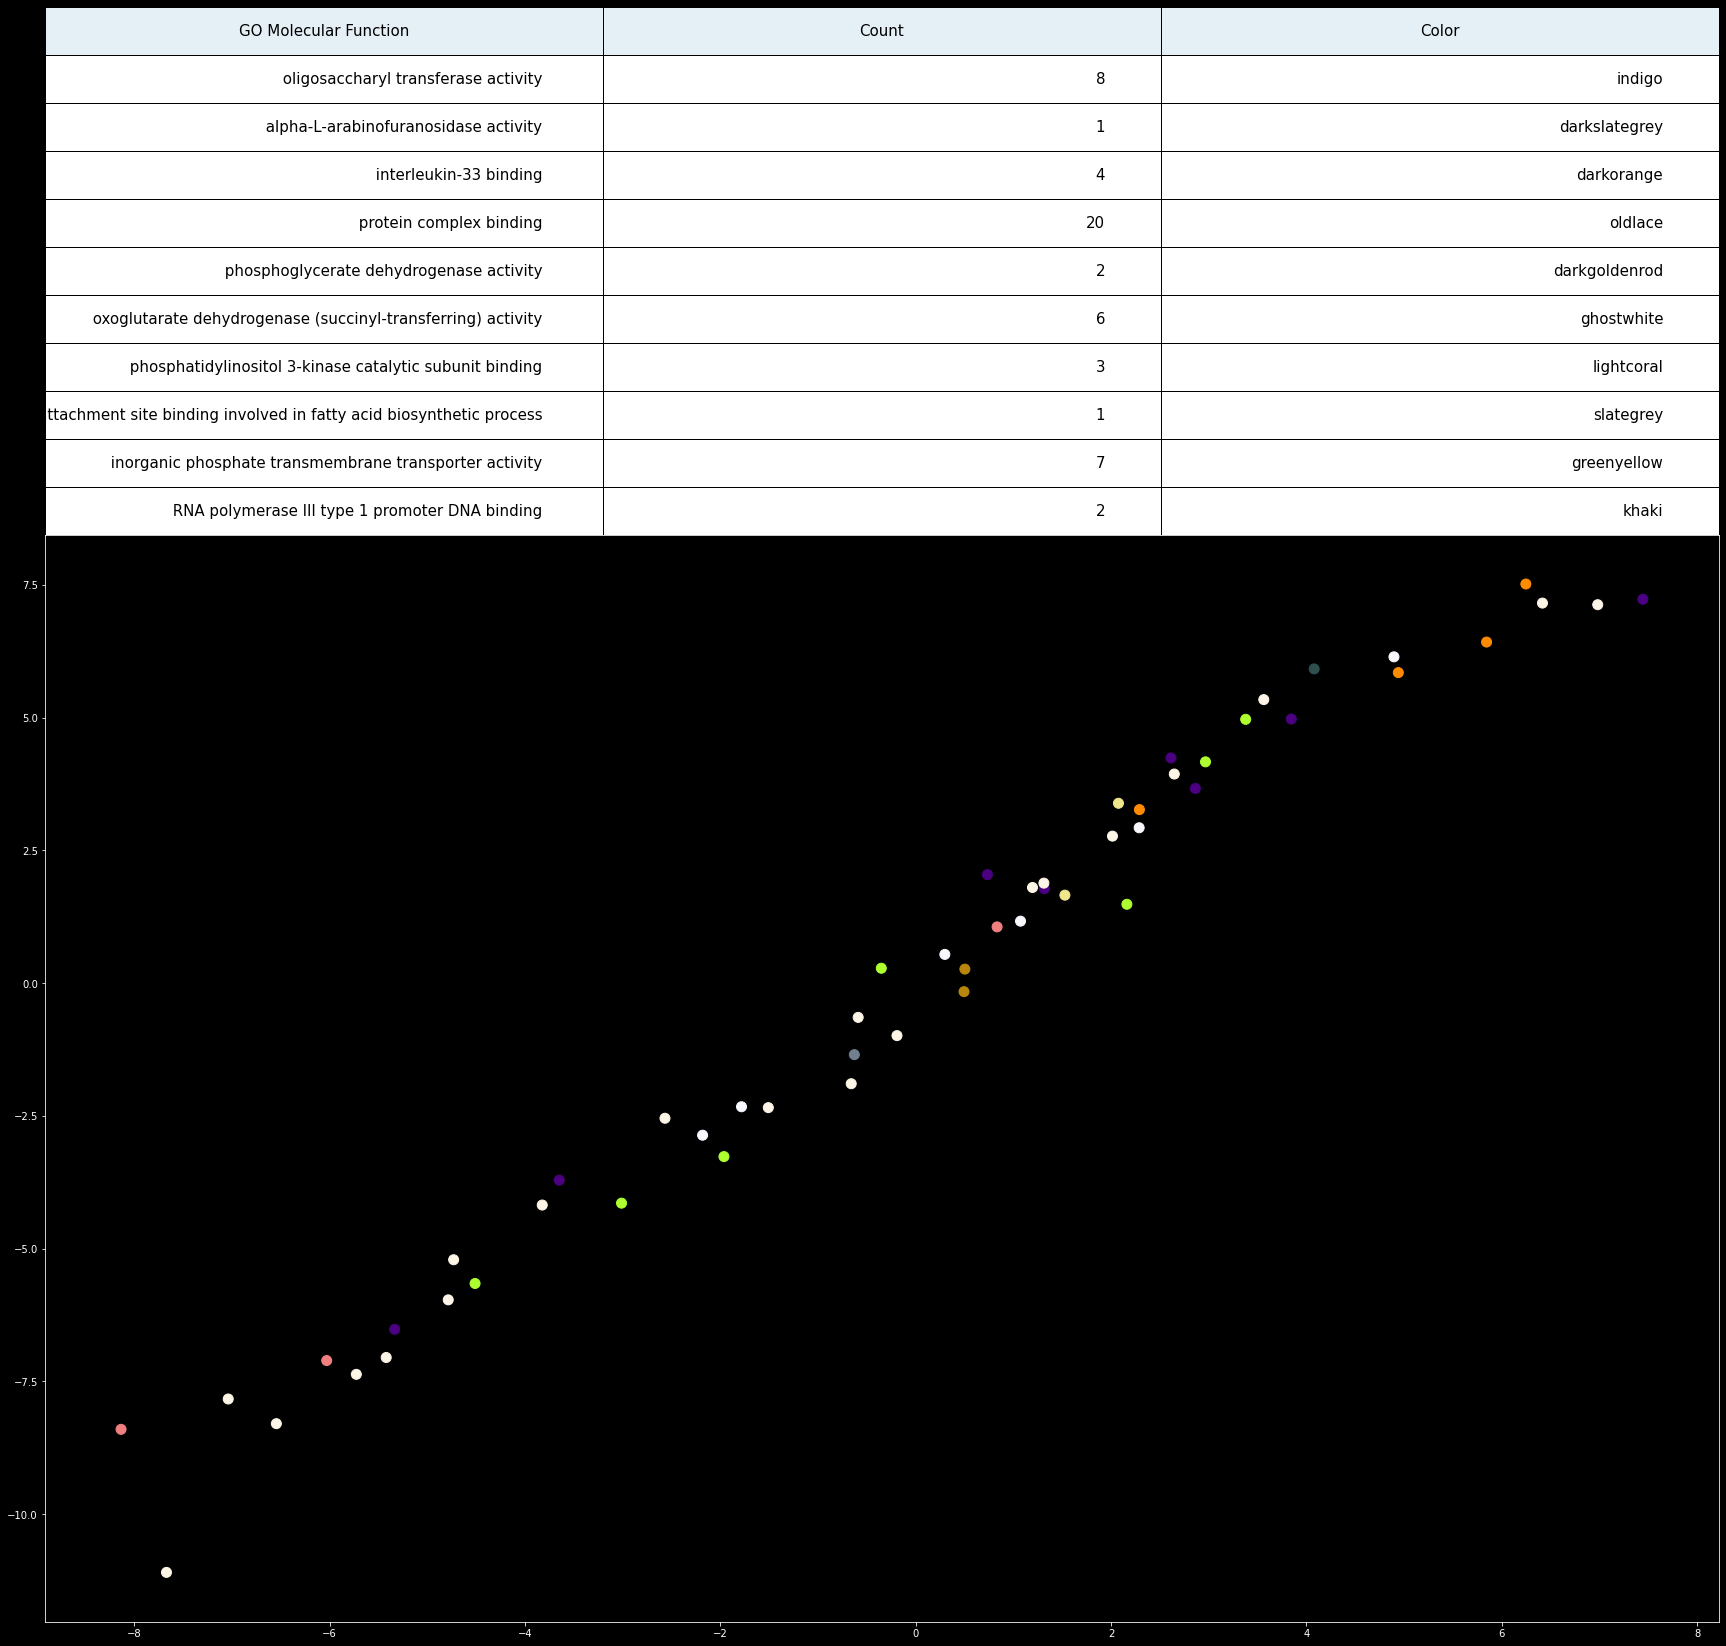

In [109]:
x=[]
y=[]
#z=[]
for i in df_2d:
    x.append(i[0])
    y.append(i[1])
    #z.append(i[2])

if len(df_small)<10:
    plt.style.use('dark_background')
    plt.rcParams['figure.figsize'] = [10,10]
    #ax = plt.axes(projection ="3d")
    #ax.scatter3D(x,y,z,c=colors, s= 100)
    plt.scatter(x,y,c=colors,s=100)
    for i, txt in enumerate(labels):
        plt.annotate(txt, (x[i], y[i],z[i]))
else:
    plt.style.use('dark_background')
    plt.rcParams['figure.figsize'] = [30,20]
    #ax = plt.axes(projection ="3d")
    #ax.scatter3D(x,y,z,c=colors, s= 100)
    plt.scatter(x,y,c=colors,s=100)
    df3=pd.DataFrame([Counter(labels).keys(), Counter(labels).values(), Counter(colors).keys()]).transpose()
    df3.columns=["GO Molecular Function", "Count", "Color"]
    t=plt.table(cellText=df3.values, colLabels=df3.columns, loc='top', colColours=plt.cm.BuPu(np.full(len(df3.columns), 0.1)))
    t.scale(1, 4)
    t.auto_set_font_size(False)
    t.set_fontsize(15)
    for cell in t.properties()['children']:
        cell.get_text().set_color('black')
    text=[]
    for i in Counter(labels).keys():
        text.append(i[1])
    text.append(".png")
    text="".join(text)
    print(text)
    plt.savefig(text,bbox_inches="tight")